# Global imports for plotting and running

In [2]:
import os
import pandas as pd
from common.firms_model_runner import get_recent_logs

import numpy as np
import matplotlib.pyplot as plt

In [9]:
dfs = {}
for stage in range(3):
    recent_logs = get_recent_logs("part%d" % (stage + 1,))
    if recent_logs is None:
        print("No logs for stage %d" % (stage + 1,))
        continue
    stage_path = os.path.join(recent_logs, "top", "results_firms.csv")
    print("Loading: %s" % (stage_path,))
    dfs[stage + 1] = pd.read_csv(stage_path)

Loading: /opt/logs/part1/2019_05_08/21_27_29_done/top/results_firms.csv
Loading: /opt/logs/part2/2019_03_01/21_25_01_done/top/results_firms.csv
Loading: /opt/logs/part3/2019_03_01/21_29_50_done/top/results_firms.csv


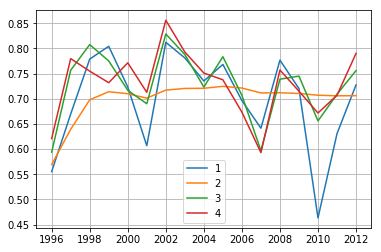

(10 / 17) Part4 > part3
part1: 0.6994
part2: 0.6993
part3: 0.7277
part4: 0.7303


In [11]:
import numpy as np
import matplotlib.pyplot as plt

part4 = [0.5429, 0.7648, 0.8309, 0.7864, 0.7024, 
         0.6818, 0.7838, 0.7843, 0.752, 0.7936, 
         0.7098, 0.6078, 0.7459, 0.7099, 0.6638, 
         0.6767, 0.7418]

part4 = [0.6884, 0.7258, 0.6826, 0.7068, 0.7591, 0.7031, 0.8315, 0.7797, 0.7459, 0.7139, 0.6193, 0.5731, 0.7312, 0.6906, 0.6671, 0.6449, 0.7554]
part4 = [0.5824, 0.7867, 0.809, 0.7566, 0.7278, 0.7358, 0.8136, 0.7932, 0.7474, 0.776, 0.6926, 0.609, 0.7711, 0.6971, 0.6472, 0.6883, 0.7635]
part4 = [0.6209, 0.7796, 0.7547, 0.7318, 0.7713, 0.7126, 0.8559, 0.7928, 0.751, 0.7376, 0.6734, 0.5928, 0.757, 0.7149, 0.6716, 0.7068, 0.79]


part4 = np.array(part4)
comb1 = dfs[1][(dfs[1].feat_type == "combined") & (dfs[1].inp_type == "combined")]
comb2 = dfs[2][dfs[2].feat_type == "combined"]
comb3 = dfs[3][(dfs[3].feat_type == "combined") & (dfs[3].epoch == 2)]
plt.plot(comb1.year, comb1.auc_test)  # , '-', comb1.year, comb1.auc_test, '.')
plt.plot(comb2.year, comb2.auc_test)
plt.plot(comb3.year, comb3.auc_test)
plt.plot(comb3.year, part4)
plt.legend(["1", "2", "3", "4"])
plt.grid(True)
plt.show()

# print(sum(np.array(comb3.auc_test) > np.array(comb1.auc_test)), len(comb1.auc_test))
print("(%d / %d) Part4 > part3" % (sum(part4 > np.array(comb3.auc_test)), len(comb1.auc_test)))

print("part1: %.4f" % (np.mean(comb1.auc_test),))
print("part2: %.4f" % (np.mean(comb2.auc_test),))
print("part3: %.4f" % (np.mean(comb3.auc_test),))
print("part4: %.4f" % (np.mean(part4),))


# Part1 plots: 4 types of input
- Combined topological features with inner content
- Combined topological features without inner content
- Neighbors topological data with inner content
- Neighbors topological data without inner content

In [3]:
part1_logs = get_recent_logs("part1")
stage_path = os.path.join(part1_logs, "top", "results_firms.csv")
print("Loading: %s" % (stage_path,))
# stage_path = r"/opt/logs/part1/2019_05_08/21_27_29_done/top/results_firms.csv"
# stage_path = r"/opt/logs/part1/2019_05_10/08_21_29_done/top/results_firms.csv"
p1_df = pd.read_csv(stage_path)
p1_df

Loading: /opt/logs/part1/2019_05_10/08_21_29_done/top/results_firms.csv


,feat_type,inp_type,year,loss_val,loss_test,acc,auc_test,train_p,norm_adj,epoch
0,combined,combined,1996,2.929093,2.516504,0.811606,0.558111,60,True,None
1,multi,combined,1996,2.360221,2.637478,0.770395,0.524634,60,True,None
2,combined,combined,1997,0.871692,1.076104,0.790104,0.662534,60,True,None
3,multi,combined,1997,1.396803,1.639379,0.785315,0.619048,60,True,None
4,combined,combined,1998,0.736302,0.742994,0.802278,0.787083,60,True,None
5,multi,combined,1998,0.770195,0.757937,0.765663,0.794582,60,True,None
6,combined,combined,1999,0.725473,0.597780,0.834175,0.808250,60,True,None
7,multi,combined,1999,1.007852,0.730786,0.816498,0.799075,60,True,None
8,combined,combined,2000,1.724185,1.464842,0.826009,0.723268,60,True,None
9,multi,combined,2000,2.215514,1.632446,0.813453,0.711455,60,True,None


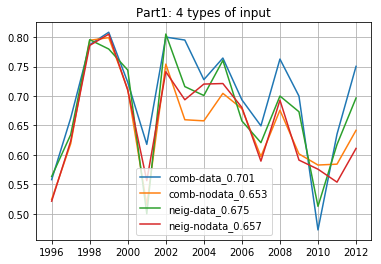

In [22]:
p1_dfs = {
    "comb-data":   p1_df[(p1_df.feat_type == "combined") & (p1_df.inp_type == "combined")],
    "comb-nodata": p1_df[(p1_df.feat_type == "multi") & (p1_df.inp_type == "combined")],
    "neig-data":   p1_df[(p1_df.feat_type == "combined") & (p1_df.inp_type == "neighbors")],
    "neig-nodata": p1_df[(p1_df.feat_type == "multi") & (p1_df.inp_type == "neighbors")],
}

for label, df in p1_dfs.items():
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="lower center")
# plt.ylim(0.35, 0.85)
plt.title("Part1: 4 types of input")
plt.grid(True)
plt.show()

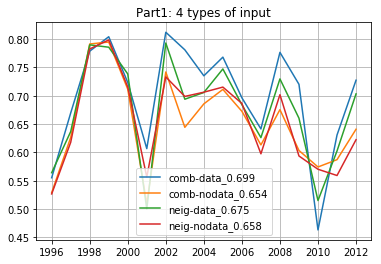

In [20]:
p1_dfs = {
    "comb-data":   p1_df[(p1_df.feat_type == "combined") & (p1_df.inp_type == "combined")],
    "comb-nodata": p1_df[(p1_df.feat_type == "multi") & (p1_df.inp_type == "combined")],
    "neig-data":   p1_df[(p1_df.feat_type == "combined") & (p1_df.inp_type == "neighbors")],
    "neig-nodata": p1_df[(p1_df.feat_type == "multi") & (p1_df.inp_type == "neighbors")],
}

for label, df in p1_dfs.items():
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="lower center")
# plt.ylim(0.35, 0.85)
plt.title("Part1: 4 types of input")
plt.grid(True)
plt.show()

# Part2 plots: 2 types of input
- Combined topological features with inner content
- Neighbors topological data with inner content

In [4]:
part2_logs = get_recent_logs("part2")
stage_path = os.path.join(part2_logs, "top", "results_firms.csv")
# stage_path = r"/opt/logs/part2/2019_05_10/05_23_47_done/top/results_firms.csv"
print("Loading: %s" % (stage_path,))
p2_df = pd.read_csv(stage_path)
p2_df

Loading: /opt/logs/part2/2019_05_10/05_23_47_done/top/results_firms.csv


,feat_type,year,loss_val,loss_test,acc,auc_test,train_p,norm_adj,epoch
0,combined,1996,2.412445,2.853855,0.812447,0.684486,60,True,None
1,combined,1997,0.675795,0.695264,0.728651,0.684493,60,True,None
2,combined,1998,0.550738,0.534711,0.726607,0.684547,60,True,None
3,combined,1999,0.725786,0.596754,0.777778,0.684581,60,True,None
4,combined,2000,1.793802,1.436650,0.833184,0.684571,60,True,None
5,combined,2001,0.855336,0.870738,0.787234,0.684548,60,True,None
6,combined,2002,1.653502,0.634989,0.746204,0.684588,60,True,None
7,combined,2003,0.803171,0.598994,0.766033,0.684605,60,True,None
8,combined,2004,0.819771,0.724469,0.755396,0.684612,60,True,None
9,combined,2005,0.872319,0.679532,0.760341,0.684629,60,True,None


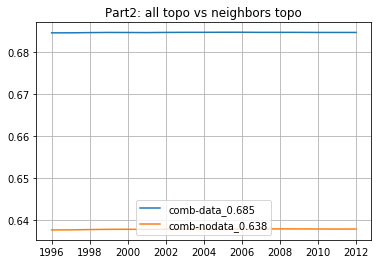

In [52]:
p2_dfs = {
    "comb-data":   p2_df[p2_df.feat_type == "combined"],
    "comb-nodata":   p2_df[p2_df.feat_type == "multi"],
}

for label, df in p2_dfs.items():
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="lower center")
# plt.ylim(0.35, 0.85)
plt.title("Part2: all topo vs neighbors topo")
plt.grid(True)
plt.show()

# Part 3 plots

In [5]:
part3_logs = get_recent_logs("part3")
stage_path = os.path.join(part3_logs, "top", "results_firms.csv")
print("Loading: %s" % (stage_path,))
p3_df = pd.read_csv(stage_path)
p3_df

Loading: /opt/logs/part3/2019_05_12/01_07_51_done/top/results_firms.csv


,feat_type,year,loss_val,loss_test,acc,auc_test,train_p,norm_adj,epoch
0,combined,1996,0.717185,0.729597,0.192599,0.571681,0.7,unspecified,0
1,combined,1997,0.642098,0.633259,0.561053,0.724505,0.7,unspecified,0
2,combined,1998,0.614410,0.623614,0.647681,0.721928,0.7,unspecified,0
3,combined,1999,0.642836,0.624343,0.734007,0.723292,0.7,unspecified,0
4,combined,2000,0.692536,0.636177,0.796413,0.731380,0.7,unspecified,0
5,combined,2001,0.694124,0.680717,0.827761,0.680159,0.7,unspecified,0
6,combined,2002,0.672959,0.565535,0.835141,0.803150,0.7,unspecified,0
7,combined,2003,0.689170,0.578706,0.821853,0.772320,0.7,unspecified,0
8,combined,2004,0.633758,0.637118,0.800959,0.732143,0.7,unspecified,0
9,combined,2005,0.663026,0.649287,0.804136,0.747321,0.7,unspecified,0


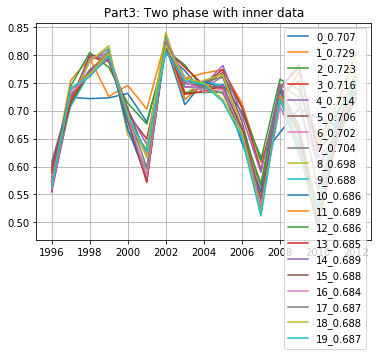

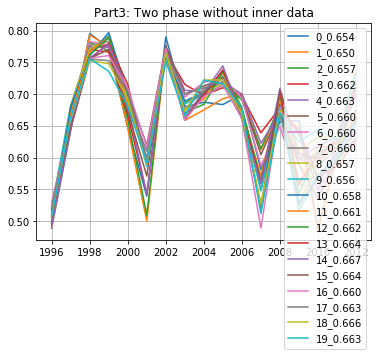

In [53]:
p3_multi_dfs = {
    epoch:   p3_df[(p3_df.epoch == epoch) & (p3_df.feat_type == "multi")] for epoch in set(p3_df.epoch)
}
p3_combined_dfs = {
    epoch:   p3_df[(p3_df.epoch == epoch) & (p3_df.feat_type == "combined")] for epoch in set(p3_df.epoch)
}

for label, df in p3_combined_dfs.items():
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="best")
# plt.ylim(0.35, 0.85)
plt.title("Part3: Two phase with inner data")
plt.grid(True)
plt.show()

plt.figure(1)
for label, df in p3_multi_dfs.items():
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="best")
# plt.ylim(0.35, 0.85)
plt.title("Part3: Two phase without inner data")
plt.grid(True)
plt.show()

max_comb_label3, max_comb_df3 = max(p3_combined_dfs.items(), key=lambda x: np.mean(x[1].auc_test))
max_multi_label3, max_multi_df3 = max(p3_multi_dfs.items(), key=lambda x: np.mean(x[1].auc_test))

# Part4 plots

In [2]:
part4_logs = get_recent_logs("part4")
stage_path = os.path.join(part4_logs, "top", "results_firms.csv")
print("Loading: %s" % (stage_path,))
p4_df = pd.read_csv(stage_path)
p4_df

Loading: /opt/logs/part4/2019_05_12/02_24_43_done/top/results_firms.csv


,feat_type,year,loss_val,loss_test,acc,auc_test,train_p,norm_adj,epoch
0,combined,1996,0.692970,0.692711,0.047939,0.565053,60,True,4
1,combined,1997,0.692872,0.693042,0.044693,0.537087,60,True,4
2,combined,1998,0.693064,0.692577,0.048820,0.489314,60,True,4
3,combined,1999,0.691652,0.693753,0.039562,0.612080,60,True,4
4,combined,2000,0.693279,0.693261,0.044843,0.483324,60,True,4
5,combined,2001,0.692666,0.693111,0.043566,0.558423,60,True,4
6,combined,2002,0.690479,0.695298,0.035792,0.453318,60,True,4
7,combined,2003,0.693469,0.695012,0.034442,0.588031,60,True,4
8,combined,2004,0.690560,0.693332,0.043165,0.565964,60,True,4
9,combined,2005,0.691673,0.691654,0.052311,0.533809,60,True,4


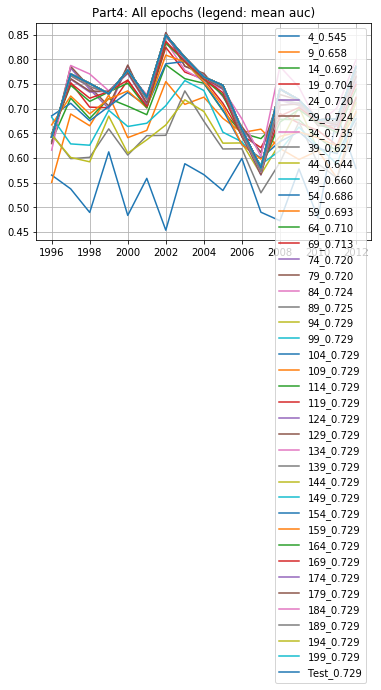

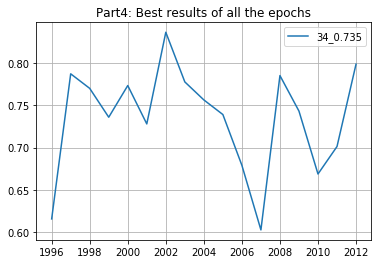

In [19]:
p4_dfs = {
    epoch:   p4_df[p4_df.epoch == epoch] for epoch in set(p4_df.epoch)
}

last_df = p4_dfs.pop('None', None)

for label, df in sorted(p4_dfs.items(), key=lambda x: int(x[0])):
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))

if last_df is not None:
    plt.plot(last_df.year, last_df.auc_test, label="%s_%.3f" % ("Test", np.mean(last_df.auc_test),))
plt.legend(loc="best")
# plt.ylim(0.35, 0.85)
plt.title("Part4: All epochs (legend: mean auc)")
plt.grid(True)
plt.show()

plt.figure(1)
max_label4, max_df4 = max(p4_dfs.items(), key=lambda x: np.mean(x[1].auc_test))
plt.plot(max_df4.year, max_df4.auc_test, label="%s_%.3f" % (max_label4, np.mean(max_df4.auc_test),))
plt.legend(loc="best")
plt.title("Part4: Best results of all the epochs")
plt.grid(True)
plt.show()

# Part 5: Best result accross all models
- Take the model with the lowest loss on the value

0.7248274588228628


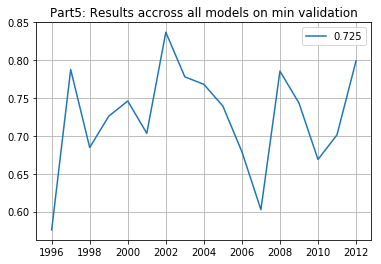

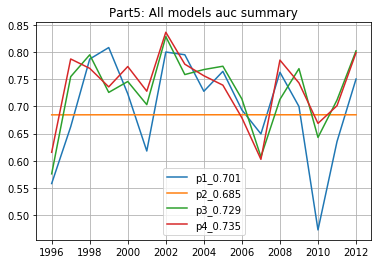

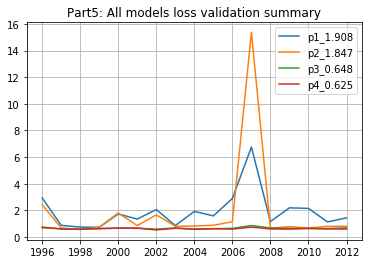

In [54]:
df1 = p1_dfs["comb-data"]
df2 = p2_dfs["comb-data"]
df3 = max_comb_df3
df4 = max_df

all_models = {"p1": df1, "p2": df2, "p3": df3, "p4": df4}
years = sorted(df1.year)

res = []
for year in years:
    best_df = min(all_models.values(), key=lambda df: float(df[df.year == year].loss_val))
    res.append(best_df[best_df.year == year])
    
min_val = np.array([float(x.auc_test) for x in res])
print(np.mean(min_val))

plt.plot(years, min_val, label="%.3f" % (np.mean(min_val),))
plt.legend(loc="best")
plt.title("Part5: Results accross all models on min validation")
plt.grid(True)
plt.show()

plt.figure(1)
for label, df in sorted(all_models.items(), key=lambda x: x[0]):
    plt.plot(df.year, df.auc_test, label="%s_%.3f" % (label, np.mean(df.auc_test),))
plt.legend(loc="best")
plt.title("Part5: All models auc summary")
plt.grid(True)
plt.show()

plt.figure(2)
for label, df in sorted(all_models.items(), key=lambda x: x[0]):
    plt.plot(df.year, df.loss_val, label="%s_%.3f" % (label, np.mean(df.loss_val),))
plt.legend(loc="best")
plt.title("Part5: All models loss validation summary")
plt.grid(True)
plt.show()

#     print(min(all_models, key=lambda df: df[df.year == year].loss_val))
# best_years = [min(all_models, key=lambda df: df[df.year == year].loss_val) for year in years]